In [113]:
### Importing necessary libraries

In [3]:
import os
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [10]:
N_SAMPLES = 2000

def generate_data():
    #Generating random data
    centers = [(0.9,0.05),(0.05,0.94)]

    X,y = make_blobs(n_samples=N_SAMPLES,n_features=2,
                     cluster_std=0.4,centers=centers,
                     shuffle=False,random_state=42)

    #Filtering the data which lies between [0,1]
    features = []
    labels = []

    for feature,label in zip(X,y):
        if feature[0]>=0 and feature[0]<=1 and feature[1]>=0 and feature[1]<=1:
            features.append(feature)
            labels.append(label)

    #Converting the data to numpy array
    X = np.array(features)
    y = np.array(labels)

    plt.scatter(X[:,0],X[:,1],c=y)
    plt.xlabel('Distance from bump')
    plt.ylabel('Height of the bump')
    return X,y

MultinomialNB()

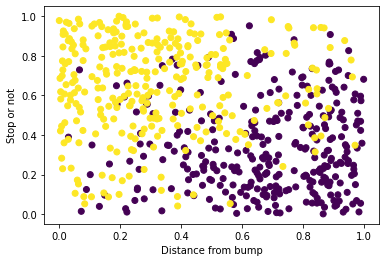

In [5]:
#Creating classifer
classifier = MultinomialNB()

X,y = generate_data()

#Training
classifier.fit(X,y)

In [9]:
#Function to plot the results
def plot_predictions(classifier):
    #Generating data for the prediction
    xx,yy = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
    
    #Making predictions for flatted array
    predictions = classifier.predict(np.c_[xx.ravel(),yy.ravel()])
    predictions = predictions.reshape(xx.shape)
    
    fig = plt.figure(figsize=(8,6))
    
    #Plotting prediction area
    plt.contourf(xx,yy,predictions,cmap=plt.cm.Paired_r,alpha=0.3)
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.xlabel('Distance from bump')
    plt.ylabel('Height of the bump')
    plt.show()
    

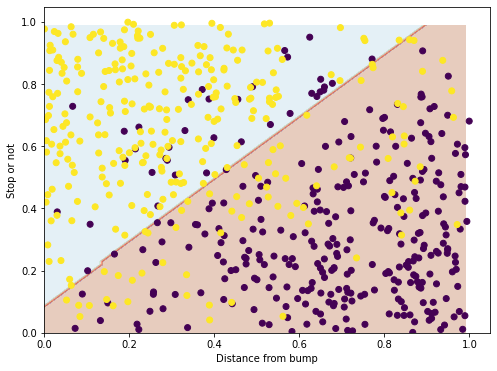

In [7]:
plot_predictions(classifier)

In [8]:
### Cross validation

#calculation n-fold caculation score
fold_score = cross_val_score(classifier,X,y,cv=5)
print(fold_score)
print(np.mean(fold_score))

[0.83739837 0.85365854 0.82113821 0.81147541 0.80327869]
0.825389844062375
